## Gaussian distribution

The Gaussian (normal) distribution is a foundational concept in statistics and data science, widely used to model natural and technological phenomena. It's called the "bell curve" due to its symmetric, bell-shaped appearance, and its mathematical properties help explain why so many real-world measurements—like height, IQ, error in devices, and test scores—are normally distributed.

The normal distribution is a continuous probability distribution that's symmetric about its mean (μ), meaning the data is evenly distributed on both sides. Most data points are close to the mean, and the probability of seeing very large or very small values decreases as you move away from the mean.  

The shape and spread of the curve are determined by:

- **Mean (μ):** the center of the distribution  
- **Standard deviation (σ):** determines the spread—smaller σ yields a tighter curve, larger σ a wider one  

The formula for the probability density function (pdf) is:

$$
f(x) = \frac{1}{\sigma \sqrt{2 \pi}} \exp \Big( - \frac{(x - \mu)^2}{2\sigma^2} \Big)
$$

Normal distribution appears frequently because many processes are influenced by numerous independent small factors. When you sum up lots of random effects (like biological influences on height, minor errors in measurements), the resulting aggregate tends to follow a normal distribution. Even if the factors themselves are not normally distributed, their sum often is.

## The Central Limit Theorem (CLT)

This fundamental theorem explains why normal distributions are everywhere:

Take any random process (distribution X). Draw n samples and average them. Repeat this many times—each time you'll get a new sample mean.  

The distribution of these sample means ($$\bar{X}_n$$) approaches a normal distribution as n grows, no matter the original distribution of X, as long as samples are independent.  

## Key Points

- **Law of large numbers:** The mean of sample means is the true mean (μ_X).  
- **Variance of the sample mean:** Reduces as σ² / n, so larger samples give tighter, more accurate estimates.  
- **CLT:** Sample means become normally distributed as n grows—even if the underlying data is not normal.  
- **Empirical rule:** For most distributions, if n ≥ 30, the sample mean is usually approximately normal.


In [17]:
# Manually calculate the normal pdf for any x, μ, and σ:
import math

def normal_pdf(x, mu, sigma):
    coef = 1.0 / (sigma * math.sqrt(2 * math.pi))
    exp_part = math.exp(-((x - mu)**2) / (2 * sigma**2))
    return coef * exp_part

# Example
value = normal_pdf(5.0, mu=4.0, sigma=2.0)
print(value)


0.17603266338214976


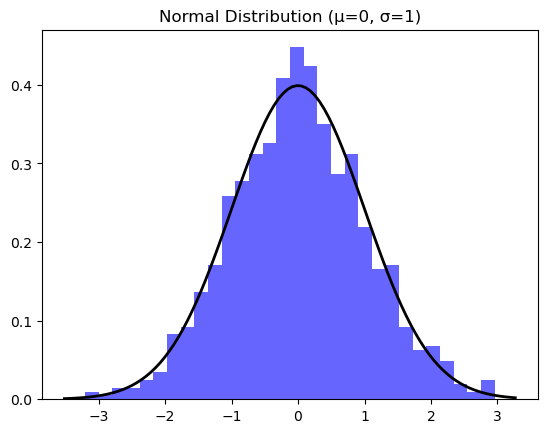

In [ ]:
# Built-In Using Scipy and Numpy

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Generate 1000 samples from a normal distribution
data = np.random.normal(loc=0, scale=1, size=1000)

# Plot histogram and the theoretical pdf
plt.hist(data, bins=30, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Normal Distribution (μ=0, σ=1)")
plt.show()

# To compute probabilities, use norm.cdf(x, mu, sigma) (“cumulative distribution function”, 
# gives probability less than or equal to x).

# To find the mean and standard deviation of samples: np.mean(data), np.std(data).


When Can We Use Normal Approximation?

- For a uniform distribution, approximation is decent at n=5
- For a Bernoulli (coin toss), approximation is better at n=50

General rule: If sample size n≥30, you can typically assume normality of the sample mean, as long as samples are independent.

In [5]:
from scipy.stats import norm
import numpy as np

# Define Gaussian distribution with mean=5, std=10
gauss_dist = norm(loc=5, scale=10)

# List to store sample means
sample_means_gauss = []

# Loop over sample sizes from 30 to 500
for size in range(30, 501):
    # Generate random sample of given size from gauss_dist
    sample = gauss_dist.rvs(size=size, random_state=22)
    
    # Compute mean of the sample
    mean = np.mean(sample)
    
    # Append mean to the list
    sample_means_gauss.append(mean)

# Compute overall mean of all sample means
gauss_mean = np.mean(sample_means_gauss)

# Compute standard deviation of all sample means
gauss_standard_deviation = np.std(sample_means_gauss)

print(type(sample_means_gauss))
print(sample_means_gauss[:5], '\n', sample_means_gauss[-5:])
print(gauss_mean)
print(gauss_standard_deviation)


<class 'list'>
[np.float64(5.711989769815023), np.float64(6.495208371007466), np.float64(5.670348611610735), np.float64(5.578864596890512), np.float64(5.5331440323908465)] 
 [np.float64(5.85212242634483), np.float64(5.842782955969858), np.float64(5.840843359217326), np.float64(5.834153785572032), np.float64(5.841178380882507)]
5.568508473194311
0.5371819419572758


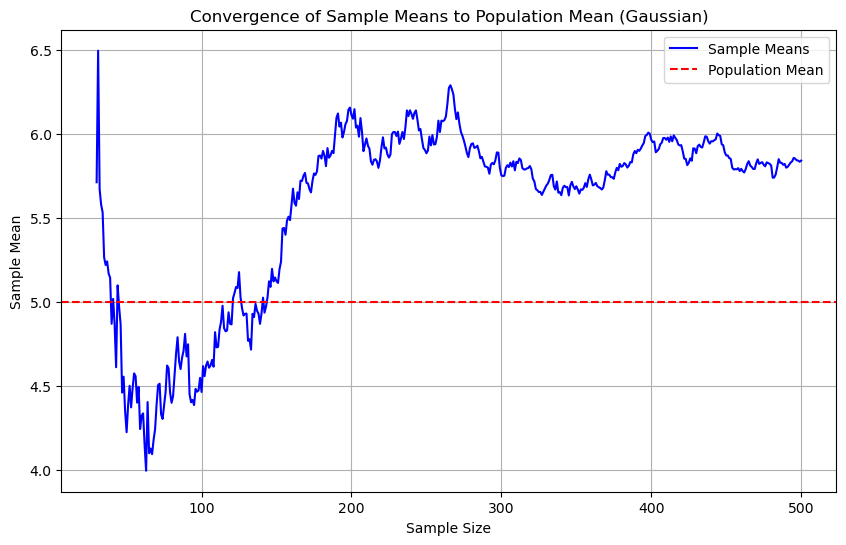

In [9]:
# Plot sample means against sample sizes
plt.figure(figsize=(10, 6))
plt.plot(range(30, 501), sample_means_gauss, color='blue', label='Sample Means')
plt.axhline(y=gauss_dist.mean(), color='red', linestyle='--', label='Population Mean')

plt.title('Convergence of Sample Means to Population Mean (Gaussian)')
plt.xlabel('Sample Size')
plt.ylabel('Sample Mean')
plt.legend()
plt.grid(True)
plt.show()

<class 'list'>
5.568508473194311
0.5371819419572758


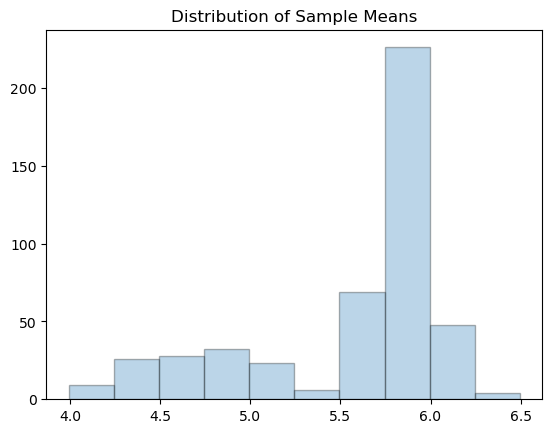

In [16]:
samples_30_or_more = sample_means_gauss[0:]
samples_mean = np.mean(samples_30_or_more)
samples_std = np.std(samples_30_or_more)

plt.hist(samples_30_or_more, edgecolor = 'black', alpha = 0.3)
plt.title('Distribution of Sample Means');

# Answer check
print(type(samples_30_or_more))
print(samples_mean)
print(samples_std)

In [3]:
# Sources:
# [1](https://mirsazzathossain.me/articles/exploring-gaussian-distribution)
# [2](https://www.youtube.com/watch?v=Vgzqvhr6srU)
# [3](https://www.geeksforgeeks.org/machine-learning/gaussian-distribution-in-machine-learning/)
# [4](https://nibmehub.com/opac-service/pdf/read/Data%20Structures%20and%20Algorithms%20in%20Python.pdf)
# [5](https://www.geeksforgeeks.org/data-science/mathematics-probability-distributions-set-3-normal-distribution/)
# [6](https://www.machinelearningmastery.com/machine-learning-in-python-step-by-step/)
# [7](https://statisticsbyjim.com/basics/normal-distribution/)
# [8](https://bugs.python.org/file47781/Tutorial_EDIT.pdf)
# [9](https://www.kaggle.com/general/569284)
# [10](https://www.youtube.com/watch?v=kqtD5dpn9C8)